In [4]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -----------------

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Matplotlib created a temporary cache directory at C:\Users\RISHI0~1\AppData\Local\Temp\matplotlib-7m76pxw8 because the default path (C:\Users\Rishi0121\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\Rishi0121\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
1172/1172 - 334s - 285ms/step - accuracy: 0.8213 - loss: 0.4008 - val_accuracy: 0.8788 - val_loss: 0.3125
Epoch 2/15
1172/1172 - 4409s - 4s/step - accuracy: 0.9049 - loss: 0.2481 - val_accuracy: 0.8783 - val_loss: 0.3079
Epoch 3/15
1172/1172 - 301s - 257ms/step - accuracy: 0.9342 - loss: 0.1815 - val_accuracy: 0.8576 - val_loss: 0.3378
Epoch 4/15
1172/1172 - 293s - 250ms/step - accuracy: 0.9453 - loss: 0.1505 - val_accuracy: 0.8804 - val_loss: 0.3209
Epoch 5/15
1172/1172 - 287s - 245ms/step - accuracy: 0.9665 - loss: 0.0960 - val_accuracy: 0.8822 - val_loss: 0.3741
Epoch 6/15
1172/1172 - 302s - 258ms/step - accuracy: 0.9791 - loss: 0.0613 - val_accuracy: 0.8791 - val_loss: 0.3743
Epoch 7/15
1172/1172 - 312s - 267ms/step - accuracy: 0.9856 - loss: 0.0425 - val_accuracy: 0.8794 - val_loss: 0.4623
Epoch 8/15
1172/1172 - 306s - 261ms/step - accuracy: 0.9889 - loss: 0.0340 - val_accuracy: 0.8786 - val_loss: 0.4465
Epoch 9/15
1172/1172 - 308s - 263ms/step - accuracy: 0.9917 - loss

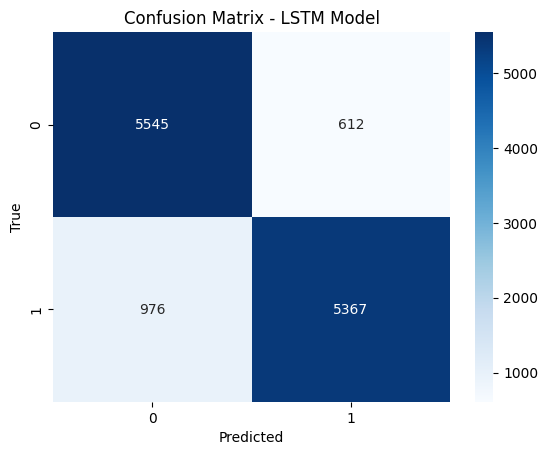


Summary of Results:
LSTM Model MSE: 0.1270
LSTM Model R² Score: 0.4917


In [2]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Download dataset from Kaggle
path = "D:/Notes/Semester 5/Deep Learning/Paper/Dataset/archive/IMDB Dataset.csv"

# Load the dataset from the downloaded path
# Assuming there's only one CSV file in the downloaded path
data = pd.read_csv(path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text.strip()
# Apply preprocessing to reviews
data['review'] = data['review'].apply(preprocess_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)
y_train, y_test = np.array(y_train), np.array(y_test)

# Initialize vectorizers
count_vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 2))
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Feature extraction
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# LSTM Model Parameters
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 200

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Convert labels for LSTM
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Define and compile LSTM model
lstm_model = Sequential([
    Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    SpatialDropout1D(0.3),
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(2, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
epochs = 15
batch_size = 32
history = lstm_model.fit(X_train_pad, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test_cat), verbose=2)

# Evaluate LSTM model
y_pred_probs = lstm_model.predict(X_test_pad, batch_size=batch_size)
y_pred = y_pred_probs.argmax(axis=1)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("\nLSTM Model MSE:", mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print("LSTM Model R² Score:", r2)

# Confusion Matrix for LSTM (optional, if still needed)
cm_lstm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Summary of Results
print("\nSummary of Results:")
print(f"LSTM Model MSE: {mse:.4f}")
print(f"LSTM Model R² Score: {r2:.4f}")

Epoch 1/15


c:\Users\Rishi0121\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1172/1172 - 514s - 439ms/step - accuracy: 0.7562 - loss: 0.5016 - val_accuracy: 0.8767 - val_loss: 0.3111
Epoch 2/15
1172/1172 - 538s - 459ms/step - accuracy: 0.8871 - loss: 0.2836 - val_accuracy: 0.8895 - val_loss: 0.2624
Epoch 3/15
1172/1172 - 519s - 443ms/step - accuracy: 0.9327 - loss: 0.1834 - val_accuracy: 0.8973 - val_loss: 0.2598
Epoch 4/15
1172/1172 - 545s - 465ms/step - accuracy: 0.9577 - loss: 0.1263 - val_accuracy: 0.8991 - val_loss: 0.2688
Epoch 5/15
1172/1172 - 504s - 430ms/step - accuracy: 0.9745 - loss: 0.0820 - val_accuracy: 0.8930 - val_loss: 0.3251
Epoch 6/15
1172/1172 - 504s - 430ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.8826 - val_loss: 0.4546
Epoch 7/15
1172/1172 - 516s - 440ms/step - accuracy: 0.9912 - loss: 0.0337 - val_accuracy: 0.8852 - val_loss: 0.4500
Epoch 8/15
1172/1172 - 516s - 440ms/step - accuracy: 0.9925 - loss: 0.0270 - val_accuracy: 0.8818 - val_loss: 0.5082
Epoch 9/15
1172/1172 - 472s - 402ms/step - accuracy: 0.9944 - loss: 0.0196 

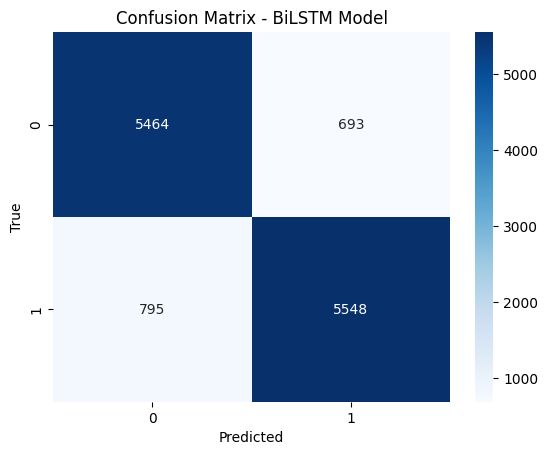

NameError: name 'hybrid_model' is not defined

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
path = "D:/Notes/Semester 5/Deep Learning/Paper/Dataset/archive/IMDB Dataset.csv"
data = pd.read_csv(path)

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    return text.strip()

# Apply preprocessing
data['review'] = data['review'].apply(preprocess_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Tokenization and padding
MAX_NB_WORDS = 50000  # Maximum number of words to keep in the vocabulary
MAX_SEQUENCE_LENGTH = 250  # Maximum sequence length for padding
EMBEDDING_DIM = 200  # Dimension of word embeddings

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# Define and compile BiLSTM model
bilstm_model = Sequential([
    Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    SpatialDropout1D(0.3),
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the BiLSTM model
EPOCHS = 15
BATCH_SIZE = 32

history_bilstm = bilstm_model.fit(
    X_train_pad, y_train_cat,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_pad, y_test_cat),
    verbose=2
)

# Evaluate the BiLSTM model
y_pred_probs_bilstm = bilstm_model.predict(X_test_pad, batch_size=BATCH_SIZE)
y_pred_bilstm = y_pred_probs_bilstm.argmax(axis=1)

# Calculate MSE and R² Score
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)
print("\nBiLSTM Model Metrics:")
print(f"Mean Squared Error: {mse_bilstm:.4f}")
print(f"R² Score: {r2_bilstm:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bilstm, target_names=["Negative", "Positive"]))

# Confusion Matrix
cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)
sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - BiLSTM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi0121\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\Rishi0121\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "Hybrid_CNN_BiLSTM_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)  │ (None, 250)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Embedding           │ (None, 250, 200)  │ 10,000,000 │ Input[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CNN (Conv1D)        │ (None, 248, 128)  │     76,928 │ Embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MaxPooling          │ (None, 124, 128)  │          0 │ CNN[0][0]         │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ BiLSTM              │ (None, 124, 256)  │    263,168 │ MaxPooling[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 124, 128)  │     32,896 │ BiLSTM[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Transformer_Attent… │ (None, 124, 128)  │          0 │ dense_3[0][0],    │
│ (Attention)         │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ Transformer_Atte… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (Dense)       │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dropout (Dropout)   │ (None, 64)        │          0 │ Dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │         65 │ Dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,381,313 (39.60 MB)

 Trainable params: 10,381,313 (39.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1172/1172 - 251s - 214ms/step - accuracy: 0.8420 - loss: 0.3522 - val_accuracy: 0.8941 - val_loss: 0.2562
Epoch 2/15
1172/1172 - 2290s - 2s/step - accuracy: 0.9394 - loss: 0.1688 - val_accuracy: 0.8902 - val_loss: 0.2925
Epoch 3/15
1172/1172 - 245s - 209ms/step - accuracy: 0.9739 - loss: 0.0815 - val_accuracy: 0.8899 - val_loss: 0.3088
Epoch 4/15
1172/1172 - 261s - 223ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.8782 - val_loss: 0.4300
Epoch 5/15
1172/1172 - 210s - 179ms/step - accuracy: 0.9921 - loss: 0.0255 - val_accuracy: 0.8806 - val_loss: 0.5666
Epoch 6/15
1172/1172 - 214s - 183ms/step - accuracy: 0.9942 - loss: 0.0183 - val_accuracy: 0.8701 - val_loss: 0.6443
Epoch 7/15
1172/1172 - 207s - 177ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.8774 - val_loss: 0.6238
Epoch 8/15
1172/1172 - 223s - 190ms/step - accuracy: 0.9965 - loss: 0.0111 - val_accuracy: 0.8737 - val_loss: 0.7803
Epoch 9/15
1172/1172 - 203s - 173ms/step - accuracy: 0.9966 - loss

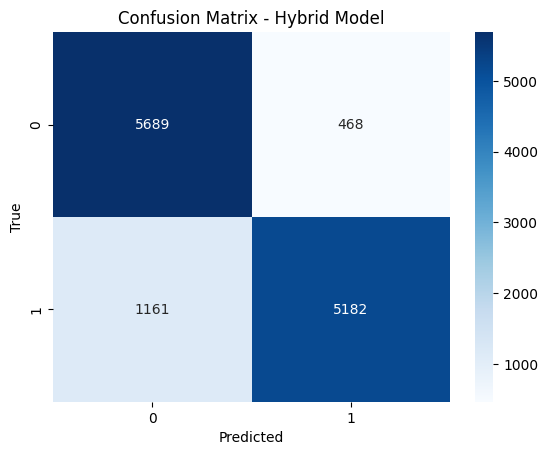

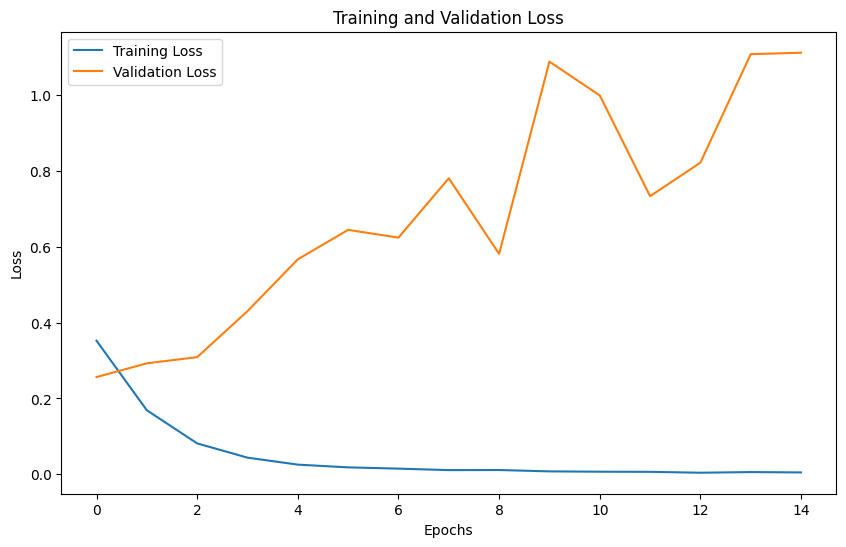

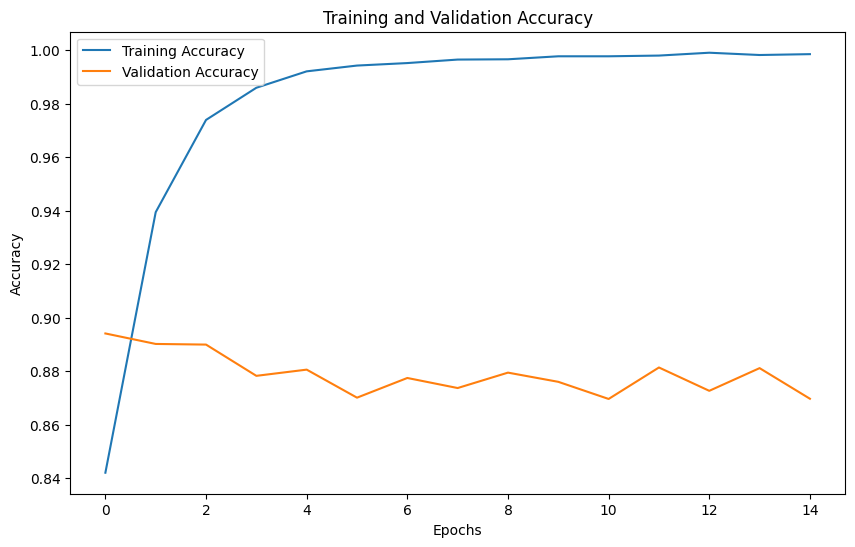

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.layers import Attention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset from the given path
path = "D:/Notes/Semester 5/Deep Learning/Paper/Dataset/archive/IMDB Dataset.csv"
data = pd.read_csv(path)

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text.strip()

# Apply preprocessing to reviews
data['review'] = data['review'].apply(preprocess_text)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.25, random_state=42)

# Tokenization and Padding
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 200

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

# Define Hybrid Model: CNN + BiLSTM + Transformer
inputs = Input(shape=(MAX_SEQUENCE_LENGTH,), name="Input")
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, name="Embedding")(inputs)

# CNN Layer
cnn_layer = Conv1D(filters=128, kernel_size=3, activation='relu', name="CNN")(embedding_layer)
cnn_layer = MaxPooling1D(pool_size=2, name="MaxPooling")(cnn_layer)

# BiLSTM Layer
bilstm_layer = Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3), name="BiLSTM")(cnn_layer)

# Transformer Attention Layer
attention_layer = Dense(128, activation="relu")(bilstm_layer)  # Project to fixed size
attention_layer = Attention(name="Transformer_Attention")([attention_layer, attention_layer])
attention_output = GlobalAveragePooling1D()(attention_layer)

# Fully Connected Layers
dense_layer = Dense(64, activation='relu', name="Dense")(attention_output)
dense_layer = Dropout(0.3, name="Dropout")(dense_layer)

# Output Layer
outputs = Dense(1, activation='sigmoid', name="Output")(dense_layer)

# Compile Model
hybrid_model = Model(inputs=inputs, outputs=outputs, name="Hybrid_CNN_BiLSTM_Transformer")
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
hybrid_model.summary()

# Train Model
epochs = 15
batch_size = 32
history = hybrid_model.fit(
    X_train_pad, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_pad, y_test),
    verbose=2
)

# Evaluate Model
y_test_pred_prob = hybrid_model.predict(X_test_pad, batch_size=batch_size)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Calculate MSE and R² Score
mse_hybrid = mean_squared_error(y_test, y_test_pred)
r2_hybrid = r2_score(y_test, y_test_pred)

print("\nHybrid Model MSE:", mse_hybrid)
print("Hybrid Model R² Score:", r2_hybrid)

# Confusion Matrix
cm_hybrid = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Hybrid Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import roc_curve, auc

# Generate ROC and AUC for all three models
models = {
    "LSTM": lstm_model,
    "BiLSTM": bilstm_model,
    "Hybrid": hybrid_model
}

roc_data = {}

# Prepare ROC and AUC data
for model_name, model in models.items():
    y_pred_prob = model.predict(X_test_pad, batch_size=32)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_data[model_name] = {"fpr": fpr, "tpr": tpr, "auc": roc_auc}

# Plot ROC curves
plt.figure(figsize=(10, 6))
for model_name, data in roc_data.items():
    plt.plot(data["fpr"], data["tpr"], label=f'{model_name} (AUC = {data["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curves for LSTM, BiLSTM, and Hybrid Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Combine Training and Validation Losses
plt.figure(figsize=(10, 6))

# LSTM Loss Plot
plt.plot(history.history['loss'], label='LSTM Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='LSTM Validation Loss')

# BiLSTM Loss Plot
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss', linestyle='--')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss')

# Hybrid Model Loss Plot
plt.plot(history.history['loss'], label='Hybrid Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Hybrid Validation Loss')

plt.title('Combined Training and Validation Loss for All Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step


ValueError: y should be a 1d array, got an array of shape (12500, 2) instead.